In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dat = pd.read_csv("prima-indians-diabetes.csv",header=None)
dat.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
dat.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dat.columns=['preg','glu','bp','sft','ins','bmi','dpf','age','class']

In [11]:
dat.shape
.7*768

537.5999999999999

In [7]:
x=dat[['preg','glu','bp','sft','ins','bmi','dpf','age']]
y=dat['class']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=4)
xtrain.shape

(537, 8)

In [13]:
xtest.shape

(231, 8)

In [14]:
#Z-score Standardization
S=StandardScaler()
S.fit(dat)
xtrain=S.fit_transform(xtrain)
xtest=S.fit_transform(xtest)

In [31]:
xtrain[:2,:]

array([[ 0.05953252, -0.8343929 ,  0.08949496,  0.72528898, -0.73954074,
         0.03601984,  0.39756239, -0.77307741],
       [-1.13556895, -0.0529908 , -3.40387542, -1.2710855 , -0.73954074,
         0.07201734, -1.00991299, -0.77307741]])

In [15]:
model=MLPClassifier(hidden_layer_sizes=(8,8,8))

In [16]:
model.fit(xtrain,ytrain)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
y_predict=model.predict(xtest)
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0])

In [20]:
ytest.value_counts()

0    152
1     79
Name: class, dtype: int64

In [18]:
acc=metrics.accuracy_score(ytest,y_predict)
print(acc)


0.753246753247


In [26]:
cm=metrics.confusion_matrix(ytest,y_predict)
print(cm)

[[121  31]
 [ 26  53]]


In [24]:
(31)/(152)

0.20394736842105263

In [19]:
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
print(sensitivity)

0.7088607594936709


In [20]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print(specificity)

0.8355263157894737


In [27]:
cr=metrics.classification_report(ytest,y_predict)
print(cr)

             precision    recall  f1-score   support

          0       0.82      0.80      0.81       152
          1       0.63      0.67      0.65        79

avg / total       0.76      0.75      0.75       231



In [29]:
53/79

0.6708860759493671

0.733469353764


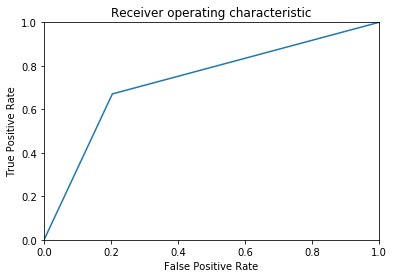

In [25]:
fpr,tpr, _ = roc_curve(ytest, y_predict)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()